In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

Using TensorFlow backend.


In [2]:
train_data='/Users/stephenowen/Desktop/395/final/fiction/fruits-360/Training'
test_data='/Users/stephenowen/Desktop/395/final/fiction/fruits-360/Test'

In [3]:
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

In [4]:
Y_train = np_utils.to_categorical(Y_train, 120)
Y_test = np_utils.to_categorical(Y_test, 120)
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [5]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
X_val = np.array(convert_image_to_array(X_val))
X_test = np.array(convert_image_to_array(X_test))

In [6]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [7]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 256,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)       

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

# running 
CNN_model = model.fit(X_train,Y_train,
        batch_size = 120,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 48398 samples, validate on 12100 samples
Epoch 1/20
 - 153s - loss: 2.3146 - accuracy: 0.3992 - val_loss: 0.3314 - val_accuracy: 0.9054

Epoch 00001: val_loss improved from inf to 0.33136, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/20
 - 155s - loss: 0.4695 - accuracy: 0.8479 - val_loss: 0.0832 - val_accuracy: 0.9750

Epoch 00002: val_loss improved from 0.33136 to 0.08319, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/20
 - 156s - loss: 0.2189 - accuracy: 0.9278 - val_loss: 0.0392 - val_accuracy: 0.9864

Epoch 00003: val_loss improved from 0.08319 to 0.03920, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/20
 - 154s - loss: 0.1391 - accuracy: 0.9557 - val_loss: 0.0316 - val_accuracy: 0.9879

Epoch 00004: val_loss improved from 0.03920 to 0.03161, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/20
 - 154s - loss: 0.0982 - accuracy: 0.9670 - val_loss: 0.0068 - val_accuracy: 0.9987

Epoch 00005: val_loss improved from 0.03161 to 0.00685, saving model t

In [10]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [12]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

20622/20622 [==============================] - 16s 794us/step
Test accuracy: 0.9877800345420837


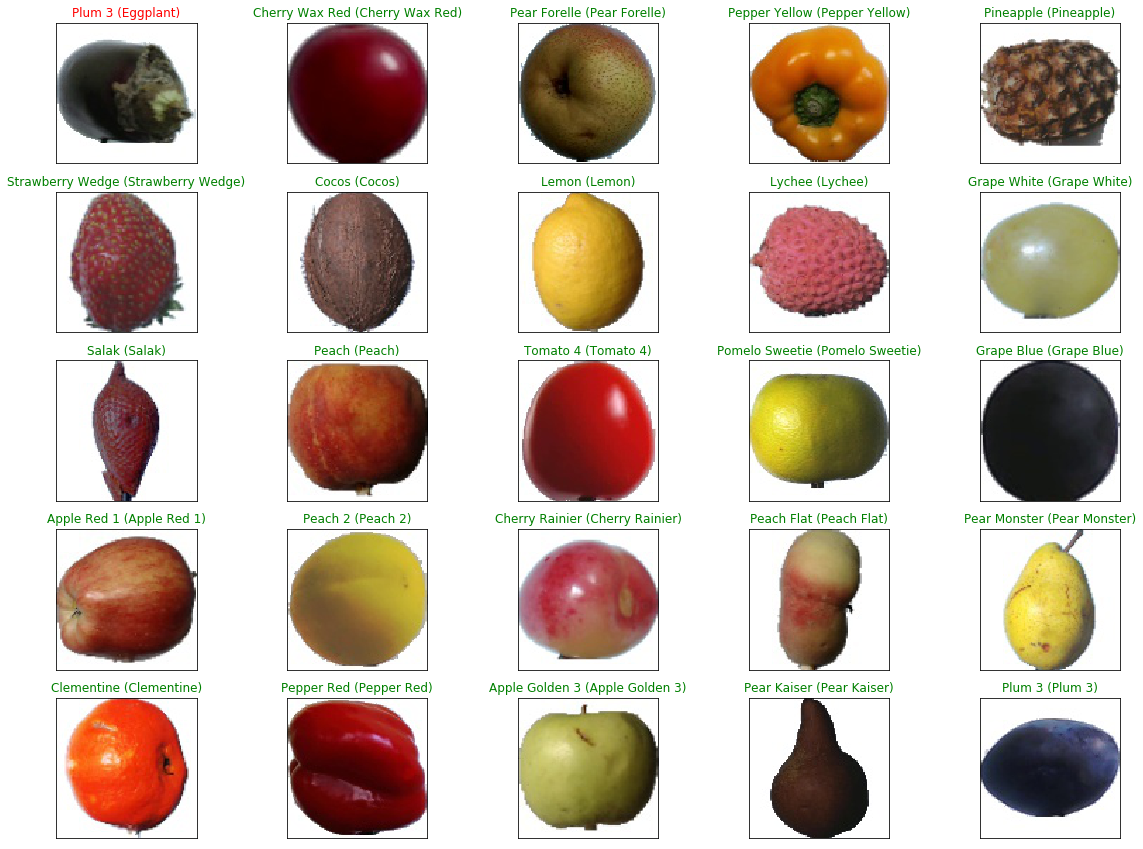

In [13]:
# using model to predict on test data
Y_pred = model.predict(X_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['acc'])  
plt.plot(CNN_model.history['val_acc'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()